# A.           Στοιχεία Ομάδας

> ### ΟΜΑΔΑ A5

> Αριστείδης Μπακούρος 03113138

> Ορφανουδάκης Φίλιππος 03113140


# B.  Εισαγωγή του dataset

Αρχικά κάνουμε upgrade στις βιβλοθήκες που θα χρειαστούμε

In [1]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #upgrade pandas package

Requirement already up-to-date: pip in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (18.1)
Requirement already up-to-date: scikit-learn in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (0.20.1)
Requirement already up-to-date: numpy in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (1.15.4)
Requirement already up-to-date: pandas in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (0.23.4)


Ύστερα αρχιζουμε να μελετάμε το dataset μας το οποίο αντιστοιχεί στο S06 και ονομάζεται Japanese Credit Screening , αλλά καθώς ανοίγουμε τις πληροφορίες του δηλαδή το Data folder και παρατηρήσουμε με ποιό dataset θα δουλέψουμε καταλήγουμε ότι ονομάζεται Credit Approval.

Η πληροφορία που μεταφέρει αυτο το dataset με λίγα λόγια ειναι η εξής , αιτήσεις για δάνεια και αν τελικά έγιναν δεκτές ή όχι.
Πιο συγκεκριμένα έχουμε 690 αιτήσεις - instances κάθε μια διαθέτει 15 κρυπτογραφημένα χαρακτηριστικά - attributes (για προστασία των προσωπικών δεδομένων) για τον αιτουντα και ένα έξτρα χαρακτηριστικό το οποίο εκφράζει αν τελικά πήρε έγκριση (+) ή όχι (-).
Αυτό μας οδηγεί και στο συμπέρασμα ότι έχουμε 2 κλάσεις στο dataset μας.

Άλλες πληροφορίες που παίρνουμε είναι ότι : 
   * Εχουμε 37 περιπτώσεις με απουσιάζουσες τιμές το οποίο αντιστοιχεί στο 5% του dataset μας
   * Το dataset μας είναι ισορροπημένο καθώς έχουμε συχνότητα εμφάνισης   + -> 307 (44.5%) και   - -> 383 (55.5%)
   * Διαθέτουμε attributes κατηγορικά, μη διατεταγμένα αλλα και διατεταγμένα οπως φαινεται παρακάτω :
    
 A1:	b, a.
 
 A2:	continuous.
 
 A3:	continuous.
 
 A4:	u, y, l, t.
 
 A5:	g, p, gg.
 
 A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
 
 A7:	v, h, bb, j, n, z, dd, ff, o.
 
 A8:	continuous.
 
 A9:	t, f.
 
 A10:	t, f.
 
 A11:	continuous.
 
 A12:	t, f.
 
 A13:	g, p, s.
 
 A14:	continuous.
 
 A15:	continuous.

Για να εισάγουμε το dataset μας κατεβάζουμε το αρχείο crx.data το ανεβάζουμε στο ιδιο directory με αυτό το notebook

In [2]:
!ls

1.1_Classification.ipynb	   Lab 6 Clustering exercise solution.ipynb
1.2_Pima_Indians_exercise_A.ipynb  Lab 6 Clustering.ipynb
1.3_Classification.ipynb	   Lab 7 Text mining exercise.ipynb
2.0 Classification.ipynb	   Lab_7_Text_Mining.ipynb
2.1_Classification.ipynb	   mydoc.txt
A5-B12.ipynb			   pythoncode.py
askhsh1_small-Copy-Copy.ipynb	   sample.csv
askhsh1_small-Copy.ipynb	   Small.ipynb
askhsh1_small.ipynb		   Solution_1.2_Pima_Indians_exercise_Á.ipynb
askhsh1_task_small.ipynb	   SOM_with_Somoclu.ipynb
Classification_3.ipynb		   task1clone.ipynb
crx.data			   task1.ipynb
doc.txt				   task_big.ipynb
example.csv			   task.ipynb
gobig.ipynb			   task_small.ipynb
hepatitis.data			   temp
isolet1.data			   tmp
isolet5.data			   Untitled.ipynb
Lab_2_Notebooks_intro.ipynb	   wdbc.data
Lab_2_Python_Intro.ipynb	   wdbc.names
Lab_6_Clustering_exercise.ipynb    wpbc.data


Διαβάζουμε το dataset μας και επειδή έχουμε ενημερωθεί για τις missing values και οτι μεταφράζονται με ερωτηματικό ? στο dataset , τις αναγνωρίζουμε κατα την ανάγωση .

In [3]:
import pandas as pd

df = pd.read_csv("crx.data",na_values = ["?"])
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,+


Παρατηρούμε ότι η πρώτη γραμμή δεν ειναι επικεφαλίδα και δεν δίνει κάποια ονομασία στα attributes , αλλά αποτελεί ένα instance οπότε το χρειαζόμαστε . Επίσης βλέπουμε ότι η αρίθμηση γίνεται αριστερά των instances.

In [4]:
df = pd.read_csv("crx.data", header=None,na_values = ["?"])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [5]:
print("Έχουμε", len(df), "δείγματα")
print("Με το καθένα να έχει ", df.shape[1], "χαρακτηριστικά")

Έχουμε 690 δείγματα
Με το καθένα να έχει  16 χαρακτηριστικά


Παρακάτω φαινονται όλα τα instances που διαθέτουν 1 ή παραπανω missing value

In [6]:
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head(37))

      0      1    3    4    5    6       13
71     b  34.83    u    g    d   bb     NaN
83     a    NaN    u    g    d    v   300.0
86     b    NaN    u    g    d    v   928.0
92     b    NaN    y    p   aa    v     0.0
97     b    NaN    u    g    c   bb   320.0
202    b  24.83    u    g    c    v     NaN
206    a  71.58  NaN  NaN  NaN  NaN     NaN
243    a  18.75    u    g    q    v     NaN
248  NaN  24.50    u    g    c   bb    73.0
254    b    NaN    u    g    k    v   380.0
270    b  37.58  NaN  NaN  NaN  NaN     NaN
278    b  24.58    y    p   ff   ff     NaN
286    a    NaN    u    g   ff   ff   200.0
327  NaN  40.83    u    g    i   bb  1160.0
329    b    NaN    y    p    i    v   411.0
330    b  20.42  NaN  NaN  NaN  NaN     NaN
346  NaN  32.25    u    g    c    v   372.0
374  NaN  28.17    u    g   aa    v   260.0
406    a  40.33    y    p    k    v     NaN
445    a    NaN    u    g   ff   ff     NaN
450    b    NaN    y    p    i   bb     0.0
453  NaN  29.75    u    g    w  

Και αναλυτικά πόσα attributes έχουν missing values 

In [7]:
import numpy as np

df_1 = pd.read_csv("crx.data",header=None,na_values = ["?"])
null_columns=df_1.columns[df_1.isnull().any()]
df_1[null_columns].isnull().sum()

0     12
1     12
3      6
4      6
5      9
6      9
13    13
dtype: int64

In [8]:
print ('Οι απουσιάζουσες τιμές είναι',df_1[null_columns].isnull().sum().sum())

Οι απουσιάζουσες τιμές είναι 67


Έχω 67 missing values το οποίο αντιστοιχεί σε 37 attributes δηλαδή το 5% του συνολικού μας dataset , αποτελεί ένα μικρό ποσοστό το οποίο αποφασίζουμε να το χειριστούμε με διαγραφή. 

In [9]:
df1=df.dropna()
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


Πλέον έχουμε 652 instances όπως φαινετα, και αποφασσίζουμε να δώσουμε όνομα σε κάθε χαρακτηριστικό

In [10]:
df1.columns = [
  'A1',
  'A2',
    'A3',
    'A4',
    'A5',
    'A6',
    'A7',
    'A8',
    'A9',
    'A10',
    'A11',
    'A12',
    'A13',
    'A14',
    'A15',
    'GRANTED'
]

In [11]:
df1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,GRANTED
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


Όπως φαίνεται και από τις πληροφορίες του dataset αλλα και απο το ίδιο το dataset έχουμε ορισμένα μη διατεγμένα χαρακτηριστικά, ο τρόπος χειρισμου τους είναι η αύξηση των στηλών και της διαστατικότητας ετσι ώστε να περιγράφονται απόλυτα τα χαρακτηριστικά .
Αυτο το επιτυγχάνουμε με την get_dummies

In [12]:
pd.get_dummies(df1,columns=['A1','A4','A5','A6','A7','A9','A10','A12','A13'])

,A2,A3,A8,A11,A14,A15,GRANTED,A1_a,A1_b,A4_l,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,30.83,0.000,1.250,1,202.0,0,+,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.040,6,43.0,560,+,1,0,0,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.500,0,280.0,824,+,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.750,5,100.0,3,+,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.710,0,120.0,0,+,0,1,0,...,0,0,1,1,0,1,0,0,0,1
5,32.08,4.000,2.500,0,360.0,0,+,0,1,0,...,0,0,1,1,0,0,1,1,0,0
6,33.17,1.040,6.500,0,164.0,31285,+,0,1,0,...,0,0,1,1,0,0,1,1,0,0
7,22.92,11.585,0.040,0,80.0,1349,+,1,0,0,...,0,0,1,1,0,1,0,1,0,0
8,54.42,0.500,3.960,0,180.0,314,+,0,1,0,...,0,0,1,1,0,1,0,1,0,0
9,42.50,4.915,3.165,0,52.0,1442,+,0,1,0,...,0,0,1,1,0,0,1,1,0,0


Έτσι καταλήγουμε σε 47 στήλες

Στη συνέχεια θέλουμε να αντιμετωπίσουμε την binary class μας , και αυτο που κάνουμε είναι η αραιή-sparse αναπαράσταση με 0 όσες αιτήσεις απορρίφθηκαν και 1 όσες αιτήσεις έγιναν δεκτές.


In [13]:
df2=pd.get_dummies(df1,columns=['A1','A4','A5','A6','A7','A9','A10','A12','A13'])
df3=df2
df3.loc[df3.GRANTED != '+', 'GRANTED'] = 0
df3.loc[df3.GRANTED == '+', 'GRANTED'] = 1

In [14]:
df3

,A2,A3,A8,A11,A14,A15,GRANTED,A1_a,A1_b,A4_l,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,30.83,0.000,1.250,1,202.0,0,1,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.040,6,43.0,560,1,1,0,0,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.500,0,280.0,824,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.750,5,100.0,3,1,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.710,0,120.0,0,1,0,1,0,...,0,0,1,1,0,1,0,0,0,1
5,32.08,4.000,2.500,0,360.0,0,1,0,1,0,...,0,0,1,1,0,0,1,1,0,0
6,33.17,1.040,6.500,0,164.0,31285,1,0,1,0,...,0,0,1,1,0,0,1,1,0,0
7,22.92,11.585,0.040,0,80.0,1349,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0
8,54.42,0.500,3.960,0,180.0,314,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0
9,42.50,4.915,3.165,0,52.0,1442,1,0,1,0,...,0,0,1,1,0,0,1,1,0,0


Στη συνέχεια παρατηρύμε οτι η στήλη GRANTED ουσιαστικά αποτελεί την έξοδο μας , βρίσκεται στη μέση και μας δυσκολευει , για διευκόλυνση ορίζουμε ξανά το dataset και την βάζουμε στο τέλος

In [15]:
cols = list(df3.columns.values) 
cols.pop(cols.index('GRANTED')) 
df4 = df3[cols+['GRANTED']] 

In [16]:
df4

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,GRANTED
0,30.83,0.000,1.250,1,202.0,0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
1,58.67,4.460,3.040,6,43.0,560,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1
2,24.50,0.500,1.500,0,280.0,824,1,0,0,1,...,0,1,1,0,1,0,1,0,0,1
3,27.83,1.540,3.750,5,100.0,3,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
4,20.17,5.625,1.710,0,120.0,0,0,1,0,1,...,0,1,1,0,1,0,0,0,1,1
5,32.08,4.000,2.500,0,360.0,0,0,1,0,1,...,0,1,1,0,0,1,1,0,0,1
6,33.17,1.040,6.500,0,164.0,31285,0,1,0,1,...,0,1,1,0,0,1,1,0,0,1
7,22.92,11.585,0.040,0,80.0,1349,1,0,0,1,...,0,1,1,0,1,0,1,0,0,1
8,54.42,0.500,3.960,0,180.0,314,0,1,0,0,...,0,1,1,0,1,0,1,0,0,1
9,42.50,4.915,3.165,0,52.0,1442,0,1,0,0,...,0,1,1,0,0,1,1,0,0,1


In [17]:
list(df4)

['A2',
 'A3',
 'A8',
 'A11',
 'A14',
 'A15',
 'A1_a',
 'A1_b',
 'A4_l',
 'A4_u',
 'A4_y',
 'A5_g',
 'A5_gg',
 'A5_p',
 'A6_aa',
 'A6_c',
 'A6_cc',
 'A6_d',
 'A6_e',
 'A6_ff',
 'A6_i',
 'A6_j',
 'A6_k',
 'A6_m',
 'A6_q',
 'A6_r',
 'A6_w',
 'A6_x',
 'A7_bb',
 'A7_dd',
 'A7_ff',
 'A7_h',
 'A7_j',
 'A7_n',
 'A7_o',
 'A7_v',
 'A7_z',
 'A9_f',
 'A9_t',
 'A10_f',
 'A10_t',
 'A12_f',
 'A12_t',
 'A13_g',
 'A13_p',
 'A13_s',
 'GRANTED']

Χωρίζουμε το dataset μας σε labels και features

In [18]:
label_names = ["Not Granted","Granted"]
labels_df = df4.iloc[:,[46]]
##feature_names = list(df4)
features_df = df4.iloc[:,:45]

Μετά την διαγραφή των instances με missing values πάμε να ελέγξουμε πάλι την ισορροπία του δείγματος μας

In [19]:
labels = labels_df.values.flatten()
mapping_classes = {0:"Not_Granted",1:"Granted"}
discrete_classes = list(set(labels))
for i in discrete_classes:
    print ('Εμφανίζεται ποσοστό δειγμάτων %.2f %% για την κλάση %s' % (100.0*sum(labels==i)/len(labels),mapping_classes[i]))


Εμφανίζεται ποσοστό δειγμάτων 54.67 % για την κλάση Not_Granted
Εμφανίζεται ποσοστό δειγμάτων 45.33 % για την κλάση Granted


In [20]:
labels_df_t = df4['GRANTED']
labels_df_t = list(map(lambda x : x, labels_df_t))

In [21]:
features_df_t=np.asarray(features_df)

Αφου μετατρέψαμε κατάλληλα το dataset μας και χωρίσαμε σε features και labels είμαστε έτοιμοι να διαχωρίσουμε σε train και test set 

In [22]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(features_df_t, labels_df_t, test_size=0.2,random_state=1)


# Γ. Baseline classification

Θα χρησιμοποιήσουμε τους ταξινομητές kNN και dummy χωρίς καμια βελτιστοποίηση ούτε του dataset ούτε των υπερπαραμέτρων της kNN.
Πιο συγκεκριμένα στην dummy θα δουλέψουμε όλες τις τακτικές ταξινόμησης που διαθέτει δηλαδή : 
*                                                                                                  uniform
*                                                                                                  constant 0,1
*                                                                                                  most frequent
*                                                                                                  stratified

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [111]:
def function(train_in,train_labels_in,test_in,test_labels_in,fmac,fmic,fwei):
    credit_accuracy = {}

    dc_uniform = DummyClassifier(strategy="uniform")

# με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
    model = dc_uniform.fit(train_in, train_labels_in)

# με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου (είσοδος τα χαρακτηριστικά μόνο)
    preds = dc_uniform.predict(test_in)

# υπολογίζουμε την ακρίβεια του συγκεκριμένου μοντέλου dummy classifier
    credit_accuracy['uniform (random)'] = dc_uniform.score(test_in, test_labels_in)


#################
    print ('Classification report for Dummy Classifier (uniform)')
    cr_dummy_uni = classification_report(test_labels_in, preds,target_names = label_names)
    print (cr_dummy_uni)

    scores_weighted = {}
    scores_macro = {}
    scores_micro = {}

    scores_weighted['Dummy-Uniform']=precision_recall_fscore_support(test_labels_in,preds,average='weighted')
    scores_macro['Dummy-Uniform']=precision_recall_fscore_support(test_labels_in,preds,average='macro')
    scores_micro['Dummy-Uniform']=precision_recall_fscore_support(test_labels_in,preds,average='micro')


    print ('Confusion Matrix for Dummy Classifier (uniform)')
    print (confusion_matrix(test_labels_in, preds))

    acc_dummy_uni = 100*accuracy_score(test_labels_in,preds)
    print ('Accuracy percentage of this classifier is %.3f %%\n' % (acc_dummy_uni))
    
    fmac[0]=f1_score(test_labels_in,preds,average='macro')
    fmic[0]=f1_score(test_labels_in,preds,average='micro')
    fwei[0]=f1_score(test_labels_in,preds,average='weighted')
    
    
    dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
    model = dc_constant_1.fit(train_in, train_labels_in)
    preds = dc_constant_1.predict(test_in)
    credit_accuracy['constant 1'] = dc_constant_1.score(test_in, test_labels_in)


#################
    print ('Classification report for Dummy Classifier (constant-1)')
    cr_dummy_const1 = classification_report(test_labels_in, preds,target_names = label_names)
    print (cr_dummy_const1)

    scores_weighted['Dummy-Const1']=precision_recall_fscore_support(test_labels_in,preds,average='weighted')
    scores_macro['Dummy-Const1']=precision_recall_fscore_support(test_labels_in,preds,average='macro')
    scores_micro['Dummy-Const1']=precision_recall_fscore_support(test_labels_in,preds,average='micro')


    print ('Confusion Matrix for Dummy Classifier (constant-1)')
    print (confusion_matrix(test_labels_in, preds))

    acc_dummy_const1 = 100*accuracy_score(test_labels_in,preds)
    print ('Accuracy percentage of this classifier is %.3f %%\n' % (acc_dummy_const1))
    
    fmac[1]=f1_score(test_labels_in,preds,average='macro')
    fmic[1]=f1_score(test_labels_in,preds,average='micro')
    fwei[1]=f1_score(test_labels_in,preds,average='weighted')
    
    dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
    model = dc_constant_0.fit(train_in, train_labels_in)
    preds = dc_constant_0.predict(test_in)
    credit_accuracy['constant 0'] = dc_constant_0.score(test_in, test_labels_in)

#################
    print ('Classification report for Dummy Classifier (constant-0)')
    cr_dummy_const0 = classification_report(test_labels_in, preds,target_names = label_names)
    print (cr_dummy_const0)

    scores_weighted['Dummy-Const0']=precision_recall_fscore_support(test_labels_in,preds,average='weighted')
    scores_macro['Dummy-Const0']=precision_recall_fscore_support(test_labels_in,preds,average='macro')
    scores_micro['Dummy-Const0']=precision_recall_fscore_support(test_labels_in,preds,average='micro')

    print ('Confusion Matrix for Dummy Classifier (constant-0)')
    print (confusion_matrix(test_labels_in, preds))

    acc_dummy_const0 = 100*accuracy_score(test_labels_in,preds)
    print ('Accuracy percentage of this classifier is %.3f %%\n' % (acc_dummy_const0))
    
    fmac[2]=f1_score(test_labels_in,preds,average='macro')
    fmic[2]=f1_score(test_labels_in,preds,average='micro')
    fwei[2]=f1_score(test_labels_in,preds,average='weighted')
    
    dc_most_frequent = DummyClassifier(strategy="most_frequent")
    model = dc_most_frequent.fit(train_in, train_labels_in)
    preds = dc_most_frequent.predict(test_in)
    credit_accuracy['most_frequent'] = dc_most_frequent.score(test_in, test_labels_in)

#################
    print ('Classification report for Dummy Classifier (most frequent)')
    cr_dummy_freq = classification_report(test_labels_in, preds,target_names = label_names)
    print (cr_dummy_freq)

    scores_weighted['Dummy-Most_Freq']=precision_recall_fscore_support(test_labels_in,preds,average='weighted')
    scores_macro['Dummy-Most_Freq']=precision_recall_fscore_support(test_labels_in,preds,average='macro')
    scores_micro['Dummy-Most_Freq']=precision_recall_fscore_support(test_labels_in,preds,average='micro')

    print ('Confusion Matrix for Dummy Classifier (most frequent)')
    print (confusion_matrix(test_labels_in, preds))

    acc_dummy_freq = 100*accuracy_score(test_labels_in,preds)
    print ('Accuracy percentage of this classifier is %.3f %%\n' % (acc_dummy_freq))
    
    fmac[3]=f1_score(test_labels_in,preds,average='macro')
    fmic[3]=f1_score(test_labels_in,preds,average='micro')
    fwei[3]=f1_score(test_labels_in,preds,average='weighted')
    
    
    
    dc_stratified = DummyClassifier(strategy="stratified")
    model = dc_stratified.fit(train_in, train_labels_in)
    preds = dc_stratified.predict(test_in)
    credit_accuracy['stratified'] = dc_stratified.score(test_in, test_labels_in)

#################
    print ('Classification report for Dummy Classifier (stratified)')
    cr_dummy_strat = classification_report(test_labels_in, preds,target_names = label_names)
    print (cr_dummy_strat)

    scores_weighted['Dummy-Strat']=precision_recall_fscore_support(test_labels_in,preds,average='weighted')
    scores_macro['Dummy-Strat']=precision_recall_fscore_support(test_labels_in,preds,average='macro')
    scores_micro['Dummy-Strat']=precision_recall_fscore_support(test_labels_in,preds,average='macro')

    print ('Confusion Matrix for Dummy Classifier (stratified)')
    print (confusion_matrix(test_labels_in, preds))

    acc_dummy_strat = 100*accuracy_score(test_labels_in,preds)
    print ('Accuracy percentage of this classifier is %.3f %%\n' % (acc_dummy_strat))
    
    fmac[4]=f1_score(test_labels_in,preds,average='macro')
    fmic[4]=f1_score(test_labels_in,preds,average='micro')
    fwei[4]=f1_score(test_labels_in,preds,average='weighted')
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(train_in, train_labels_in)
    knn_preds = knn.predict(test_in)


#################
    print ('Classification report for kNN')
    cr_knn_no = classification_report(test_labels_in,knn_preds, target_names=label_names)
    print (cr_knn_no)

    scores_weighted['kNN-non-opt']=precision_recall_fscore_support(test_labels_in,knn_preds,average='weighted')
    scores_macro['kNN-non-opt']=precision_recall_fscore_support(test_labels_in,knn_preds,average='macro')
    scores_micro['kNN-non-opt']=precision_recall_fscore_support(test_labels_in,knn_preds,average='micro')

    print ('Confusion Matrix for non-optimized kNN')
    print (confusion_matrix(test_labels_in, knn_preds))

    acc_knn_no = 100*accuracy_score(test_labels_in,knn_preds)
    print ('\nAccuracy percentage of this classifier is %.3f %%\n' % (acc_knn_no))
    
    fmac[5]=f1_score(test_labels_in,knn_preds,average='macro')
    fmic[5]=f1_score(test_labels_in,knn_preds,average='micro')
    fwei[5]=f1_score(test_labels_in,knn_preds,average='weighted')
    
    
    import matplotlib.pyplot as plt

    f1_scores_macro = [item[2] for item in scores_macro.values()]
    f1_scores_micro = [item[2] for item in scores_micro.values()]
    f1_scores_weighted = [item[2] for item in scores_weighted.values()]


    y_pos = np.arange(len(f1_scores_macro))
    plt.barh(y_pos, f1_scores_macro, align='center',color='red')
    plt.yticks(y_pos, scores_macro.keys())
    plt.title('F1_macro average scores')
    plt.show()

    y_pos = np.arange(len(f1_scores_micro))
    plt.barh(y_pos, f1_scores_micro, align='center',color='yellow')
    plt.yticks(y_pos, scores_micro.keys())
    plt.title('F1_micro average scores')
    plt.show()

    
    y_pos = np.arange(len(f1_scores_weighted))
    plt.barh(y_pos, f1_scores_weighted, align='center',color='green')
    plt.yticks(y_pos, scores_weighted.keys())
    plt.title('F1_weighted average scores')
    plt.show()
    
    
    return

Έχουμε κατασκευάσει μια συνάρτηση η οποία δέχεται το train, train_labels , test , test labels και εκπαιδεύει τον dummy για κάθε τακτική του και τον kNN που έχει default την υπερπαραπετρο n_neighbors.

Για κάθε ταξινομήτη εμφανίζεται το classification report του , το confusion matrix του , και το ποσοστό ακρίβειας του.
Στο τέλος εμφανίζονται plots που γίνεται συγκριση κάθε τακτικής ταξινομητη για f1_macro avg, f1_micro avg και f1_weighted avg

Classification report for Dummy Classifier (uniform)
              precision    recall  f1-score   support

 Not Granted       0.58      0.58      0.58        72
     Granted       0.48      0.47      0.48        59

   micro avg       0.53      0.53      0.53       131
   macro avg       0.53      0.53      0.53       131
weighted avg       0.53      0.53      0.53       131

Confusion Matrix for Dummy Classifier (uniform)
[[42 30]
 [31 28]]
Accuracy percentage of this classifier is 53.435 %

Classification report for Dummy Classifier (constant-1)
              precision    recall  f1-score   support

 Not Granted       0.00      0.00      0.00        72
     Granted       0.45      1.00      0.62        59

   micro avg       0.45      0.45      0.45       131
   macro avg       0.23      0.50      0.31       131
weighted avg       0.20      0.45      0.28       131

Confusion Matrix for Dummy Classifier (constant-1)
[[ 0 72]
 [ 0 59]]
Accuracy percentage of this classifier is 45.038

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


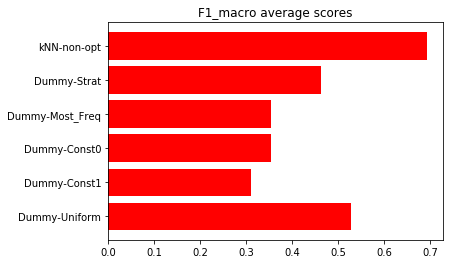

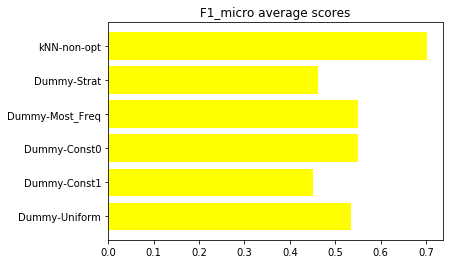

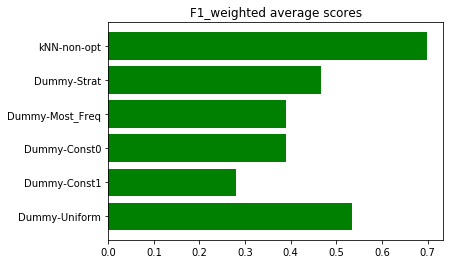

In [112]:
fwei=[0,0,0,0,0,0]
fmac=[0,0,0,0,0,0]
fmic=[0,0,0,0,0,0]
function(train,train_labels,test,test_labels,fwei,fmac,fmic)

Ακρίβεια -Precision- ($P$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false positives ($F_p$).
$$P = \frac{T_p}{T_p+F_p}$$
Ανάκληση -Recall- ($R$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false negatives ($F_n$).
$$R = \frac{T_p}{T_p + F_n}$$
Συχνά χρησιμοποιούμε και το ($F_1$) score, το οποίο είναι ο αρμονικός μέσος της ακρίβειας και της ανάκλησης.
$$F1 = 2\frac{P \times R}{P+R}$$
Ιδανικά θέλουμε και υψηλή ακρίβεια και υψηλή ανάκληση, ωστόσο μεταξύ της ακρίβειας και της ανάκλησης υπάρχει γενικά trade-off. Στην οριακή περίπτωση του ταξινομητή που επιστρέφει σταθερά μόνο τη θετική κλάση για παράδειγμα, η ανάκληση θα είναι 1 αλλά η ακρίβεια θα έχει τη μικρότερη δυνατή τιμή της. Γενικά, κατεβάζοντας το κατώφλι της απόφασης του ταξινομητή, αυξάνουμε την ανάκληση και μειώνουμε την ακρίβεια και αντιστρόφως. 



### Παρατηρούμε την εμφανή υπεροχή σε όλα τα scores του kNN , αν αγνοήσουμε την constant τακτική του dummy που είναι λογικό να έχει ανεβασμένα νούμερα στα αντίστοιχα classes.

# Δ. Βελτιστοποίηση ταξινομητών

Σε αυτή τη φάση πάμε να βρούμε τη βέλτιστη αρχιτεκτονική για κάθε ταξινομητή.
Επειδή ο dummy δεν επιδέχεται βελτίωση θα ασχοληθούμε καθαρά με τον kNN.

Πιο συγκεκριμένα βρίκσουμε τις διαθέσιμες βελτιστοποιήσεις για το dataset μας οι οποιές ειναι : VarianceThreshold,imbalanced-learn MinMaxScaler,StandardScaler και PCA .

Φτιάχνουμε συναρτήσεις που να δέχονται ένα συγκρκιμένο train , test set , και εφαρμόζουν τις βελτιστοποιήσεις πάνω τους.

Για τις εξόδους των παραπάνων συναρτήσεων εφαρμόζουμε cross validation η οποία θα μας δώσει τη βέλτιστη υπερπαράμερτο n_neighbors για την εφαρμογή του ταξινομητη kNN 

Ύστερα έχοντας αυτα τα δεδομένα εκπαιδεύω τον kNN και βγάζω τα αποτελεσματα μου.

Αρχικά βλέπουμε αν ειναι ισορροπημενο το train,test set μας , ετσι ωστε αν χρειαστει να κόψω κάποια instances μέσω της imbalanced

In [26]:
print('το αρχικο train set εχει ',train_labels.count(0),'δειγματα κατηγοριας 0 - not granted')

το αρχικο train set εχει  285 δειγματα κατηγοριας 0 - not granted


In [27]:
print('το αρχικο train set εχει ',train_labels.count(1),'δειγματα κατηγοριας 1 - granted')

το αρχικο train set εχει  237 δειγματα κατηγοριας 1 - granted


Βλέπουμε όπως ειναι αναμενόμενο ότι έχει κρατήσει την ισορροπία του και το train,test set όπως και το αρχικό, επομένως δεν θα χρειαστει αυτή η βελτιστοποίηση ούτε και στη πορεία καθώς όλες οι υπολοιπες βελτιστοποιήσεις δεν επηρεάζουν την ισορροπία

Πάμε να συνεχίσουμε με τις υπόλοιπες , το σκεπτικό με το οποίο εργαστήκαμε είναι να δημιουργήσουμε όλες τους πιθανους συνδυασμούς των μετασχηματιστών και στη συνέχεια να περάσουμε το set μας στον cross validation και τέλος στον kNN .

To cross validation όπως και κάθε συνδυασμός έχει υλοποιηθεί 2 φορές , 1 για την f1_macro και 1 για την f1_micro

In [28]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import f1_score
import time

In [29]:
def variance(train,test,thresh):
    selector = VarianceThreshold(threshold=thresh)
    train_reduced = selector.fit_transform(train)
    mask = selector.get_support()
    test_reduced = test[:,mask]
    return train_reduced,test_reduced

In [30]:
def min_max(train,test):
    min_max_scaler = preprocessing.MinMaxScaler()
    train_scaled = min_max_scaler.fit_transform(train)
    test_scaled = min_max_scaler.transform(test)
    return train_scaled,test_scaled

In [31]:
def scaled_Standard(train,test):

    scaler = preprocessing.StandardScaler().fit(train)
    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)

    return train_scaled,test_scaled

In [32]:
def pca(n,train,test):

    pcaa = PCA(n_components=n)


    trainPCA =  pcaa.fit_transform(train)
    testPCA = pcaa.transform(test)


    return trainPCA , testPCA

In [33]:
def cross_macro(train):

    myList = list(range(1,50))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))
    cv_scores = []
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, train, train_labels, cv=10, scoring='f1_macro')
        cv_scores.append(scores.mean())
    mean_error = [1 - x for x in cv_scores]
    optimal_k = neighbors[mean_error.index(min(mean_error))]
    return optimal_k

In [34]:
def cross_micro(train):

    myList = list(range(1,50))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))
    cv_scores = []
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, train, train_labels, cv=10, scoring='f1_micro')
        cv_scores.append(scores.mean())
    mean_error = [1 - x for x in cv_scores]
    optimal_k = neighbors[mean_error.index(min(mean_error))]
    return optimal_k

In [35]:
def acc_macro(train_in,test_in,num):
    
    knn = KNeighborsClassifier(n_neighbors = num)
    knn.fit(train_in, train_labels)
    knn_preds = knn.predict(test_in)
    scores_weighted = {}
    scores_macro = {}
    scores_micro = {}
    return f1_score(test_labels,knn_preds,average='macro')


In [36]:
def acc_micro(train_in,test_in,num):
    
    knn = KNeighborsClassifier(n_neighbors = num)
    knn.fit(train_in, train_labels)
    knn_preds = knn.predict(test_in)
    scores_weighted = {}
    scores_macro = {}
    scores_micro = {}
    return f1_score(test_labels,knn_preds,average='micro')


In [37]:
def minim(a,b):
    if a <= b:
        c = a - 1
    else:
        c = b
    return c

In [38]:
def knn_macro(maxim,nei,pc,th):
    k=cross_macro(train)
    fin=acc_macro(train,test,k)
    maxim[0]=fin
    nei[0]=k
    return

In [39]:
def knn_micro(maxim,nei,pc,th):
    k=cross_micro(train)
    fin=acc_micro(train,test,k)
    maxim[0]=fin
    nei[0]=k
    return

In [40]:
def minmax_knn_macro(maxim,nei,pc,th):
    train_1,test_1=min_max(train,test)
    k=cross_macro(train_1)
    fin=acc_macro(train_1,test_1,k)
    maxim[1]=fin
    nei[1]=k
    return

In [41]:
def minmax_knn_micro(maxim,nei,pc,th):
    train_1,test_1=min_max(train,test)
    k=cross_micro(train_1)
    fin=acc_micro(train_1,test_1,k)
    maxim[1]=fin
    nei[1]=k
    return

In [42]:
def standard_knn_macro(maxim,nei,pc,th):
    train_1,test_1=scaled_Standard(train,test)
    k=cross_macro(train_1)
    fin=acc_macro(train_1,test_1,k)
    maxim[2]=fin
    nei[2]=k
    return

In [43]:
def standard_knn_micro(maxim,nei,pc,th):
    train_1,test_1=scaled_Standard(train,test)
    k=cross_micro(train_1)
    fin=acc_micro(train_1,test_1,k)
    maxim[2]=fin
    nei[2]=k
    return

In [44]:
def pca_knn_macro(maxim,nei,pc,th):
    maxim[3]=0
    maxn_pc = minim(train.shape[0], train.shape[1])
    for y in range(1,maxn_pc,1):
        train_1,test_1 = pca(y,train,test)
        k=cross_macro(train_1)
        fin=acc_macro(train_1,test_1,k)
        if fin>maxim[3]:
            maxim[3]=fin
            pc[3]=y
            nei[3]=k
    return

In [45]:
def pca_knn_micro(maxim,nei,pc,th):
    maxim[3]=0
    maxn_pc = minim(train.shape[0], train.shape[1])
    for y in range(1,maxn_pc,1):
        train_1,test_1 = pca(y,train,test)
        k=cross_micro(train_1)
        fin=acc_micro(train_1,test_1,k)
        if fin>maxim[3]:
            maxim[3]=fin
            pc[3]=y
            nei[3]=k
    return

In [46]:
def minmax_pca_knn_macro(maxim,nei,pc,th):
    maxim[4]=0
    train_1,test_1=min_max(train,test)
    maxn_pc = minim(train_1.shape[0], train_1.shape[1])
    for y in range(1,maxn_pc,1):
        train_2,test_2 = pca(y,train_1,test_1)
        k=cross_macro(train_2)
        fin=acc_macro(train_2,test_2,k)
        if fin>maxim[4]:
            maxim[4]=fin
            pc[4]=y
            nei[4]=k
    return

In [47]:
def minmax_pca_knn_micro(maxim,nei,pc,th):
    maxim[4]=0
    train_1,test_1=min_max(train,test)
    maxn_pc = minim(train_1.shape[0], train_1.shape[1])
    for y in range(1,maxn_pc,1):
        train_2,test_2 = pca(y,train_1,test_1)
        k=cross_micro(train_2)
        fin=acc_micro(train_2,test_2,k)
        if fin>maxim[4]:
            maxim[4]=fin
            pc[4]=y
            nei[4]=k
    return

In [48]:
def standard_pca_knn_macro(maxim,nei,pc,th):
    maxim[5]=0
    train_1,test_1=scaled_Standard(train,test)
    maxn_pc = minim(train_1.shape[0], train_1.shape[1])
    for y in range(1,maxn_pc,1):
        train_2,test_2 = pca(y,train_1,test_1)
        k=cross_macro(train_2)
        fin=acc_macro(train_2,test_2,k)
        if fin>maxim[5]:
            maxim[5]=fin
            pc[5]=y
            nei[5]=k
    return

In [49]:
def standard_pca_knn_micro(maxim,nei,pc,th):
    maxim[5]=0
    train_1,test_1=scaled_Standard(train,test)
    maxn_pc = minim(train_1.shape[0], train_1.shape[1])
    for y in range(1,maxn_pc,1):
        train_2,test_2 = pca(y,train_1,test_1)
        k=cross_micro(train_2)
        fin=acc_micro(train_2,test_2,k)
        if fin>maxim[5]:
            maxim[5]=fin
            pc[5]=y
            nei[5]=k
    return

In [50]:
def thres_knn_macro(maxim,nei,pc,th,a,b,c):   
    maxim[6]=0
    for x in np.arange(a,b,c):
        train_1,test_1=variance(train,test,x)
        k=cross_macro(train_1)
        fin=acc_macro(train_1,test_1,k)
        if fin>maxim[6]:
            maxim[6]=fin
            th[6]=x
            nei[6]=k
    return

In [51]:
def thres_knn_micro(maxim,nei,pc,th,a,b,c):   
    maxim[6]=0
    for x in np.arange(a,b,c):
        train_1,test_1=variance(train,test,x)
        k=cross_micro(train_1)
        fin=acc_micro(train_1,test_1,k)
        if fin>maxim[6]:
            maxim[6]=fin
            th[6]=x
            nei[6]=k
    return

In [52]:
def thres_minmax_knn_macro(maxim,nei,pc,th,a,b,c):   
    maxim[7]=0
    for x in np.arange(a,b,c):
        train_1,test_1=variance(train,test,x)
        train_1,test_1=min_max(train_1,test_1)
        k=cross_macro(train_1)
        fin=acc_macro(train_1,test_1,k)
        if fin>maxim[7]:
            maxim[7]=fin
            th[7]=x
            nei[7]=k
    return

In [53]:
def thres_minmax_knn_micro(maxim,nei,pc,th,a,b,c):   
    maxim[7]=0
    for x in np.arange(a,b,c):
        train_1,test_1=variance(train,test,x)
        train_1,test_1=min_max(train_1,test_1)
        k=cross_micro(train_1)
        fin=acc_micro(train_1,test_1,k)
        if fin>maxim[7]:
            maxim[7]=fin
            th[7]=x
            nei[7]=k
    return

In [54]:
def thres_standard_knn_macro(maxim,nei,pc,th,a,b,c) :   
    maxim[8]=0
    for x in np.arange(a,b,c):
        train_1,test_1=variance(train,test,x)
        train_1,test_1=scaled_Standard(train_1,test_1)
        k=cross_macro(train_1)
        fin=acc_macro(train_1,test_1,k)
        if fin>maxim[8]:
            maxim[8]=fin
            th[8]=x
            nei[8]=k
    return

In [55]:
def thres_standard_knn_micro(maxim,nei,pc,th,a,b,c) :   
    maxim[8]=0
    for x in np.arange(a,b,c):
        train_1,test_1=variance(train,test,x)
        train_1,test_1=scaled_Standard(train_1,test_1)
        k=cross_micro(train_1)
        fin=acc_micro(train_1,test_1,k)
        if fin>maxim[8]:
            maxim[8]=fin
            th[8]=x
            nei[8]=k
    return

In [56]:
def thres_minmax_pca_knn_macro(maxim,nei,pc,th,a,b,c):    
    maxim[9]=0
    for x in np.arange(a,b,c):
        train_1,test_1=variance(train,test,x)
        train_1,test_1=min_max(train_1,test_1)
        maxn_pc = minim(train_1.shape[0], train_1.shape[1])
        for y in range(1,maxn_pc,1):
            train_2,test_2 = pca(y,train_1,test_1)
            k=cross_macro(train_2)
            fin=acc_macro(train_2,test_2,k)
            if fin>maxim[9]:
                maxim[9]=fin
                th[9]=x
                pc[9]=y
                nei[9]=k
    return

In [57]:
def thres_minmax_pca_knn_micro(maxim,nei,pc,th,a,b,c):    
    maxim[9]=0
    for x in np.arange(a,b,c):
        train_1,test_1=variance(train,test,x)
        train_1,test_1=min_max(train_1,test_1)
        maxn_pc = minim(train_1.shape[0], train_1.shape[1])
        for y in range(1,maxn_pc,1):
            train_2,test_2 = pca(y,train_1,test_1)
            k=cross_micro(train_2)
            fin=acc_micro(train_2,test_2,k)
            if fin>maxim[9]:
                maxim[9]=fin
                th[9]=x
                pc[9]=y
                nei[9]=k
    return

In [58]:
def thres_standard_pca_knn_macro(maxim,nei,pc,th,a,b,c):    
    maxim[10]=0
    for x in np.arange(a,b,c):
        train_1,test_1=variance(train,test,x)
        train_1,test_1=scaled_Standard(train_1,test_1)
        maxn_pc = minim(train_1.shape[0], train_1.shape[1])
        for y in range(1,maxn_pc,1):
            train_2,test_2 = pca(y,train_1,test_1)
            k=cross_macro(train_2)
            fin=acc_macro(train_2,test_2,k)
            if fin>maxim[10]:
                maxim[10]=fin
                th[10]=x
                pc[10]=y
                nei[10]=k
    return 

In [59]:
def thres_standard_pca_knn_micro(maxim,nei,pc,th,a,b,c):    
    maxim[10]=0
    for x in np.arange(a,b,c):
        train_1,test_1=variance(train,test,x)
        train_1,test_1=scaled_Standard(train_1,test_1)
        maxn_pc = minim(train_1.shape[0], train_1.shape[1])
        for y in range(1,maxn_pc,1):
            train_2,test_2 = pca(y,train_1,test_1)
            k=cross_micro(train_2)
            fin=acc_micro(train_2,test_2,k)
            if fin>maxim[10]:
                maxim[10]=fin
                th[10]=x
                pc[10]=y
                nei[10]=k
    return 

In [60]:
def pipe_grid_macro(a,b,c):
    maxim=[0,0,0,0,0,0,0,0,0,0,0]
    nei=[0,0,0,0,0,0,0,0,0,0,0]
    pc=[0,0,0,0,0,0,0,0,0,0,0]
    th=[0,0,0,0,0,0,0,0,0,0,0]
    mx=0
    thes=0
    knn_macro(maxim,nei,pc,th)
    print('9%')
    minmax_knn_macro(maxim,nei,pc,th)
    print('18%')
    standard_knn_macro(maxim,nei,pc,th)
    print('27%')
    pca_knn_macro(maxim,nei,pc,th)
    print('36%')
    minmax_pca_knn_macro(maxim,nei,pc,th)
    print('45%')
    standard_pca_knn_macro(maxim,nei,pc,th)
    print('54%')
    thres_knn_macro(maxim,nei,pc,th,a,b,c)
    print('63%')
    thres_minmax_knn_macro(maxim,nei,pc,th,a,b,c)
    print('72%')
    thres_standard_knn_macro(maxim,nei,pc,th,a,b,c)
    print('81%')
    thres_minmax_pca_knn_macro(maxim,nei,pc,th,a,b,c)
    print('90%')
    thres_standard_pca_knn_macro(maxim,nei,pc,th,a,b,c)
    print('99%')
    print('\n')
    print('\n')
    print('\n')
    print("!!!!!!!!!")
    print("H βέλτιστη αρχιτεκτονική για f1_macro ειναι η εξής:\n")
    for i in range(11):
        if(maxim[i]>mx):
            thes=i
            mx=maxim[i]
    if thes==0:
        print('kNN με cross validation έχω f_macro=',maxim[0],'για k_neighbors=',nei[0],'\n')
    elif thes==1:
        print('min_max και kNN με cross validation έχω f_macro=',maxim[1],'για k_neighbors=',nei[1],'\n')
    elif thes==2:
        print('scaled_Standard και kNN με cross validation έχω f_macro=',maxim[2],'για k_neighbors=',nei[2],'\n')
    elif thes==3:
        print('pca με n_components=',pc[3],' και kNN με cross validation έχω f_macro=',maxim[3],'για k_neighbors=',nei[3],'\n')
    elif thes==4:
        print('minmax και pca και kNN με n_components=',pc[4],' με cross validation έχω f_macro=',maxim[4],'για k_neighbors=',nei[4],'\n')
    elif thes==5:
        print('scaled_Standard και pca με n_components=',pc[5],' και kNN με cross validation έχω f_macro=',maxim[5],'για k_neighbors=',nei[5],'\n')
    elif thes==6:
        print('Vthreshold με value=',th[6],' και kNN με cross validation έχω f_macro=',maxim[6],'για k_neighbors=',nei[6],'\n')
    elif thes==7:
        print('Vthreshold με value=',th[7],' και min_max και kNN με cross validation έχω f_macro=',maxim[7],'για k_neighbors=',nei[7],'\n')
    elif thes==8:
        print('Vthreshold με value=',th[8],' και scaled_Standard και kNN με cross validation έχω f_macro=',maxim[8],'για k_neighbors=',nei[8],'\n')
    elif thes==9:
        print('Vthreshold με value=',th[9],' και min_max και pca με n_components=',pc[9],'  kNN με cross validation έχω f_macro=',maxim[9],'για k_neighbors=',nei[9],'\n')
    elif thes==10:
        print('Vthreshold με value=',th[10],' και scaled_Standard και pca με n_components=',pc[10],'  kNN με cross validation έχω f_macro=',maxim[10],'για k_neighbors=',nei[10],'\n')
    return

In [61]:
def pipe_grid_micro(a,b,c):
    maxim=[0,0,0,0,0,0,0,0,0,0,0]
    nei=[0,0,0,0,0,0,0,0,0,0,0]
    pc=[0,0,0,0,0,0,0,0,0,0,0]
    th=[0,0,0,0,0,0,0,0,0,0,0]
    mx=0
    thes=0
    knn_micro(maxim,nei,pc,th)
    print('9%')
    minmax_knn_micro(maxim,nei,pc,th)
    print('18%')
    standard_knn_micro(maxim,nei,pc,th)
    print('27%')
    pca_knn_micro(maxim,nei,pc,th)
    print('36%')
    minmax_pca_knn_micro(maxim,nei,pc,th)
    print('45%')
    standard_pca_knn_micro(maxim,nei,pc,th)
    print('54%')
    thres_knn_micro(maxim,nei,pc,th,a,b,c)
    print('63%')
    thres_minmax_knn_micro(maxim,nei,pc,th,a,b,c)
    print('72%')
    thres_standard_knn_micro(maxim,nei,pc,th,a,b,c)
    print('81%')
    thres_minmax_pca_knn_micro(maxim,nei,pc,th,a,b,c)
    print('90%')
    thres_standard_pca_knn_micro(maxim,nei,pc,th,a,b,c)
    print('99%')
    print('\n')
    print('\n')
    print('\n')
    print("!!!!!!!!!")
    print("H βέλτιστη αρχιτεκτονική για f1_micro ειναι η εξής:\n")
    for i in range(11):
        if(maxim[i]>mx):
            thes=i
            mx=maxim[i]
    if thes==0:
        print('kNN με cross validation έχω f_micro=',maxim[0],'για k_neighbors=',nei[0],'\n')
    elif thes==1:
        print('min_max και kNN με cross validation έχω f_micro=',maxim[1],'για k_neighbors=',nei[1],'\n')
    elif thes==2:
        print('scaled_Standard και kNN με cross validation έχω f_micro=',maxim[2],'για k_neighbors=',nei[2],'\n')
    elif thes==3:
        print('pca με n_components=',pc[3],' και kNN με cross validation έχω f_micro=',maxim[3],'για k_neighbors=',nei[3],'\n')
    elif thes==4:
        print('minmax και pca και kNN με n_components=',pc[4],' με cross validation έχω f_micro=',maxim[4],'για k_neighbors=',nei[4],'\n')
    elif thes==5:
        print('scaled_Standard και pca με n_components=',pc[5],' και kNN με cross validation έχω f_micro=',maxim[5],'για k_neighbors=',nei[5],'\n')
    elif thes==6:
        print('Vthreshold με value=',th[6],' και kNN με cross validation έχω f_micro=',maxim[6],'για k_neighbors=',nei[6],'\n')
    elif thes==7:
        print('Vthreshold με value=',th[7],' και min_max και kNN με cross validation έχω f_micro=',maxim[7],'για k_neighbors=',nei[7],'\n')
    elif thes==8:
        print('Vthreshold με value=',th[8],' και scaled_Standard και kNN με cross validation έχω f_micro=',maxim[8],'για k_neighbors=',nei[8],'\n')
    elif thes==9:
        print('Vthreshold με value=',th[9],' και min_max και pca με n_components=',pc[9],'  kNN με cross validation έχω f_micro=',maxim[9],'για k_neighbors=',nei[9],'\n')
    elif thes==10:
        print('Vthreshold με value=',th[10],' και scaled_Standard και pca με n_components=',pc[10],'  kNN με cross validation έχω f_micro=',maxim[10],'για k_neighbors=',nei[10],'\n')
    return

Πάμε να βρούμε τη διακύμανση του set μας έτσι ώστε να προσαρμόσουμε κατάλληλα το κάλεσμα της Variance Threshold

In [62]:
train_variance = train.var(axis=0)
print(train_variance)
print(np.max(train_variance))

[1.49508285e+02 2.42014570e+01 1.21170006e+01 1.96205869e+01
 2.79434513e+04 1.03734130e+07 2.15469532e-01 2.15469532e-01
 1.91203887e-03 1.82120785e-01 1.81118891e-01 1.82120785e-01
 1.91203887e-03 1.81118891e-01 6.74975411e-02 1.64090369e-01
 5.75446632e-02 3.50736190e-02 4.21199043e-02 7.87752675e-02
 8.03570118e-02 1.69441141e-02 6.42092747e-02 4.90487515e-02
 1.00251758e-01 3.81673786e-03 8.96933398e-02 4.73275495e-02
 7.71861834e-02 1.13621350e-02 8.34984806e-02 1.66321692e-01
 1.50907943e-02 3.81673786e-03 1.91203887e-03 2.45504323e-01
 1.32301346e-02 2.48223749e-01 2.48223749e-01 2.46473187e-01
 2.46473187e-01 2.48058602e-01 2.48058602e-01 7.55897594e-02
 1.91203887e-03]
10373412.95494774


In [63]:
start_time = time.time()

In [64]:
pipe_grid_macro(1,1000,100)

9%
18%
27%
36%
45%
54%
63%
72%
81%
90%
99%






!!!!!!!!!
H βέλτιστη αρχιτεκτονική για f1_macro ειναι η εξής:

scaled_Standard και pca με n_components= 19  και kNN με cross validation έχω f_macro= 0.891709966934341 για k_neighbors= 49 



In [65]:
pipe_grid_micro(1,1000,100)

9%
18%
27%
36%
45%
54%
63%
72%
81%
90%
99%






!!!!!!!!!
H βέλτιστη αρχιτεκτονική για f1_micro ειναι η εξής:

scaled_Standard και pca με n_components= 6  και kNN με cross validation έχω f_micro= 0.8931297709923665 για k_neighbors= 47 



In [66]:
pipe_grid_macro(0.1,1,0.05)

9%
18%
27%
36%
45%
54%
63%
72%
81%
90%
99%






!!!!!!!!!
H βέλτιστη αρχιτεκτονική για f1_macro ειναι η εξής:

Vthreshold με value= 0.15000000000000002  και scaled_Standard και pca με n_components= 10   kNN με cross validation έχω f_macro= 0.8999236058059588 για k_neighbors= 35 



In [67]:
pipe_grid_micro(0.1,1,0.05)

9%
18%
27%
36%
45%
54%
63%
72%
81%
90%
99%






!!!!!!!!!
H βέλτιστη αρχιτεκτονική για f1_micro ειναι η εξής:

Vthreshold με value= 0.1  και scaled_Standard και pca με n_components= 10   kNN με cross validation έχω f_micro= 0.9007633587786259 για k_neighbors= 39 



In [68]:
pipe_grid_macro(1000,10000000,100000)

9%
18%
27%
36%
45%
54%
63%
72%
81%
90%
99%






!!!!!!!!!
H βέλτιστη αρχιτεκτονική για f1_macro ειναι η εξής:

scaled_Standard και pca με n_components= 8  και kNN με cross validation έχω f_macro= 0.8923708920187794 για k_neighbors= 7 



In [69]:
pipe_grid_micro(1000,10000000,100000)

9%
18%
27%
36%
45%
54%
63%
72%
81%
90%
99%






!!!!!!!!!
H βέλτιστη αρχιτεκτονική για f1_micro ειναι η εξής:

scaled_Standard και pca με n_components= 11  και kNN με cross validation έχω f_micro= 0.8931297709923665 για k_neighbors= 23 



In [71]:
pipe_grid_macro(0,0.1,0.01)

9%
18%
27%
36%
45%
54%
63%
72%
81%
90%
99%






!!!!!!!!!
H βέλτιστη αρχιτεκτονική για f1_macro ειναι η εξής:

Vthreshold με value= 0.08  και scaled_Standard και kNN με cross validation έχω f_macro= 0.8996168582375479 για k_neighbors= 19 



In [72]:
pipe_grid_micro(0,0.1,0.01)

9%
18%
27%
36%
45%
54%
63%
72%
81%
90%
99%






!!!!!!!!!
H βέλτιστη αρχιτεκτονική για f1_micro ειναι η εξής:

Vthreshold με value= 0.08  και scaled_Standard και kNN με cross validation έχω f_micro= 0.9007633587786259 για k_neighbors= 19 



In [73]:
print("Για την εύρεση του κατάλληλου fit για αυτο το training set χρειάστηκαν : %s seconds" % (time.time() - start_time))


Για την εύρεση του κατάλληλου fit για αυτο το training set χρειάστηκαν : 7956.419920682907 seconds


Όπως ήταν αναμενόμενο για μεγάλες τιμές του threshold δεν εφαρμόζεται αυτη η βελτιστοποίηση , καθώς χάνουμε μεγάλο ποσοστό απο χαρακτηριστικά που τα είχαμε ορίσει 0 ή 1 με την getdummies , αρα εχουν μικρη διακύμανση.

Επίσης βλέπουμε να επικρατεί πάντα το scaled Standard αντι του min max που είναι και αυτό αναμενόμενο , αφού ειναι απαραίτητη αυτη η βελτιστοποίηση για να δουλέψει καλύτερα ένας ταξινομητής.

Έπειτα για μια καλύτερη λειτουργία έχουμε το pca που βοηθάει πάρα πολύ για την μείωση της διαστατικότητας.

Επιλέγουμε σαν καταλληλότερο fit την τελευταία επιλογή με Vthreshold με value= 0.08  και scaled_Standard και kNN με cross validation έχω  για k_neighbors= 19 και πάμε να την εφαρμόσουμε 

In [118]:
fwei1=[0,0,0,0,0,0]
fmac1=[0,0,0,0,0,0]
fmic1=[0,0,0,0,0,0]
train_fin,test_fin=variance(train,test,0.08)
train_fin,test_fin=scaled_Standard(train_fin,test_fin)
num1=cross_macro(train_fin)

In [119]:
def function1(train_in,train_labels_in,test_in,test_labels_in,num,xron,fwei1,fmac1,fmic1):
    
    credit_accuracy = {}

    dc_uniform = DummyClassifier(strategy="uniform")

# με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
    start_time = time.time()
    model = dc_uniform.fit(train_in, train_labels_in)
    xron[0]=(time.time() - start_time)
# με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου (είσοδος τα χαρακτηριστικά μόνο)
    preds = dc_uniform.predict(test_in)

# υπολογίζουμε την ακρίβεια του συγκεκριμένου μοντέλου dummy classifier
    credit_accuracy['uniform (random)'] = dc_uniform.score(test_in, test_labels_in)


#################
    print ('Classification report for Dummy Classifier (uniform)')
    cr_dummy_uni = classification_report(test_labels_in, preds,target_names = label_names)
    print (cr_dummy_uni)

    scores_weighted = {}
    scores_macro = {}
    scores_micro = {}

    scores_weighted['Dummy-Uniform']=precision_recall_fscore_support(test_labels_in,preds,average='weighted')
    scores_macro['Dummy-Uniform']=precision_recall_fscore_support(test_labels_in,preds,average='macro')
    scores_micro['Dummy-Uniform']=precision_recall_fscore_support(test_labels_in,preds,average='micro')


    print ('Confusion Matrix for Dummy Classifier (uniform)')
    print (confusion_matrix(test_labels_in, preds))

    acc_dummy_uni = 100*accuracy_score(test_labels_in,preds)
    print ('Accuracy percentage of this classifier is %.3f %%\n' % (acc_dummy_uni))
    
    fmac1[0]=f1_score(test_labels_in,preds,average='macro')
    fmic1[0]=f1_score(test_labels_in,preds,average='micro')
    fwei1[0]=f1_score(test_labels_in,preds,average='weighted')
    
    
    dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
    start_time = time.time()
    model = dc_constant_1.fit(train_in, train_labels_in)
    xron[1]=(time.time() - start_time)
    preds = dc_constant_1.predict(test_in)
    credit_accuracy['constant 1'] = dc_constant_1.score(test_in, test_labels_in)


#################
    print ('Classification report for Dummy Classifier (constant-1)')
    cr_dummy_const1 = classification_report(test_labels_in, preds,target_names = label_names)
    print (cr_dummy_const1)

    scores_weighted['Dummy-Const1']=precision_recall_fscore_support(test_labels_in,preds,average='weighted')
    scores_macro['Dummy-Const1']=precision_recall_fscore_support(test_labels_in,preds,average='macro')
    scores_micro['Dummy-Const1']=precision_recall_fscore_support(test_labels_in,preds,average='micro')


    print ('Confusion Matrix for Dummy Classifier (constant-1)')
    print (confusion_matrix(test_labels_in, preds))

    acc_dummy_const1 = 100*accuracy_score(test_labels_in,preds)
    print ('Accuracy percentage of this classifier is %.3f %%\n' % (acc_dummy_const1))
    
    fmac1[1]=f1_score(test_labels_in,preds,average='macro')
    fmic1[1]=f1_score(test_labels_in,preds,average='micro')
    fwei1[1]=f1_score(test_labels_in,preds,average='weighted')
    
    
    dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
    start_time = time.time()
    model = dc_constant_0.fit(train_in, train_labels_in)
    xron[2]=(time.time() - start_time)
    preds = dc_constant_0.predict(test_in)
    credit_accuracy['constant 0'] = dc_constant_0.score(test_in, test_labels_in)

#################
    print ('Classification report for Dummy Classifier (constant-0)')
    cr_dummy_const0 = classification_report(test_labels_in, preds,target_names = label_names)
    print (cr_dummy_const0)

    scores_weighted['Dummy-Const0']=precision_recall_fscore_support(test_labels_in,preds,average='weighted')
    scores_macro['Dummy-Const0']=precision_recall_fscore_support(test_labels_in,preds,average='macro')
    scores_micro['Dummy-Const0']=precision_recall_fscore_support(test_labels_in,preds,average='micro')

    print ('Confusion Matrix for Dummy Classifier (constant-0)')
    print (confusion_matrix(test_labels_in, preds))

    acc_dummy_const0 = 100*accuracy_score(test_labels_in,preds)
    print ('Accuracy percentage of this classifier is %.3f %%\n' % (acc_dummy_const0))
    
    fmac1[2]=f1_score(test_labels_in,preds,average='macro')
    fmic1[2]=f1_score(test_labels_in,preds,average='micro')
    fwei1[2]=f1_score(test_labels_in,preds,average='weighted')
    
    
    dc_most_frequent = DummyClassifier(strategy="most_frequent")
    start_time = time.time()
    model = dc_most_frequent.fit(train_in, train_labels_in)
    xron[3]=(time.time() - start_time)
    preds = dc_most_frequent.predict(test_in)
    credit_accuracy['most_frequent'] = dc_most_frequent.score(test_in, test_labels_in)

#################
    print ('Classification report for Dummy Classifier (most frequent)')
    cr_dummy_freq = classification_report(test_labels_in, preds,target_names = label_names)
    print (cr_dummy_freq)

    scores_weighted['Dummy-Most_Freq']=precision_recall_fscore_support(test_labels_in,preds,average='weighted')
    scores_macro['Dummy-Most_Freq']=precision_recall_fscore_support(test_labels_in,preds,average='macro')
    scores_micro['Dummy-Most_Freq']=precision_recall_fscore_support(test_labels_in,preds,average='micro')

    print ('Confusion Matrix for Dummy Classifier (most frequent)')
    print (confusion_matrix(test_labels_in, preds))

    acc_dummy_freq = 100*accuracy_score(test_labels_in,preds)
    print ('Accuracy percentage of this classifier is %.3f %%\n' % (acc_dummy_freq))
    
    fmac1[3]=f1_score(test_labels_in,preds,average='macro')
    fmic1[3]=f1_score(test_labels_in,preds,average='micro')
    fwei1[3]=f1_score(test_labels_in,preds,average='weighted')
    
    
    
    dc_stratified = DummyClassifier(strategy="stratified")
    start_time = time.time()
    model = dc_stratified.fit(train_in, train_labels_in)
    xron[4]=(time.time() - start_time)
    preds = dc_stratified.predict(test_in)
    credit_accuracy['stratified'] = dc_stratified.score(test_in, test_labels_in)

#################
    print ('Classification report for Dummy Classifier (stratified)')
    cr_dummy_strat = classification_report(test_labels_in, preds,target_names = label_names)
    print (cr_dummy_strat)

    scores_weighted['Dummy-Strat']=precision_recall_fscore_support(test_labels_in,preds,average='weighted')
    scores_macro['Dummy-Strat']=precision_recall_fscore_support(test_labels_in,preds,average='macro')
    scores_micro['Dummy-Strat']=precision_recall_fscore_support(test_labels_in,preds,average='macro')

    print ('Confusion Matrix for Dummy Classifier (stratified)')
    print (confusion_matrix(test_labels_in, preds))

    acc_dummy_strat = 100*accuracy_score(test_labels_in,preds)
    print ('Accuracy percentage of this classifier is %.3f %%\n' % (acc_dummy_strat))
    
    fmac1[4]=f1_score(test_labels_in,preds,average='macro')
    fmic1[4]=f1_score(test_labels_in,preds,average='micro')
    fwei1[4]=f1_score(test_labels_in,preds,average='weighted')
    
    from sklearn.neighbors import KNeighborsClassifier
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=num)
    xron[5]=(time.time() - start_time)
    knn.fit(train_in, train_labels_in)
    knn_preds = knn.predict(test_in)


#################
    print ('Classification report for opt kNN')
    cr_knn_no = classification_report(test_labels_in,knn_preds, target_names=label_names)
    print (cr_knn_no)

    scores_weighted['kNN-opt']=precision_recall_fscore_support(test_labels_in,knn_preds,average='weighted')
    scores_macro['kNN-opt']=precision_recall_fscore_support(test_labels_in,knn_preds,average='macro')
    scores_micro['kNN-opt']=precision_recall_fscore_support(test_labels_in,knn_preds,average='micro')

    print ('Confusion Matrix for optimized kNN')
    print (confusion_matrix(test_labels_in, knn_preds))

    acc_knn_no = 100*accuracy_score(test_labels_in,knn_preds)
    print ('\nAccuracy percentage of this classifier is %.3f %%\n' % (acc_knn_no))
    
    fmac1[5]=f1_score(test_labels_in,knn_preds,average='macro')
    fmic1[5]=f1_score(test_labels_in,knn_preds,average='micro')
    fwei1[5]=f1_score(test_labels_in,knn_preds,average='weighted')
    
    
    
    import matplotlib.pyplot as plt

    f1_scores_macro = [item[2] for item in scores_macro.values()]
    f1_scores_micro = [item[2] for item in scores_micro.values()]
    f1_scores_weighted = [item[2] for item in scores_weighted.values()]


    y_pos = np.arange(len(f1_scores_macro))
    plt.barh(y_pos, f1_scores_macro, align='center',color='red')
    plt.yticks(y_pos, scores_macro.keys())
    plt.title('F1_macro average scores')
    plt.show()

    y_pos = np.arange(len(f1_scores_micro))
    plt.barh(y_pos, f1_scores_micro, align='center',color='yellow')
    plt.yticks(y_pos, scores_micro.keys())
    plt.title('F1_micro average scores')
    plt.show()

    
    y_pos = np.arange(len(f1_scores_weighted))
    plt.barh(y_pos, f1_scores_weighted, align='center',color='green')
    plt.yticks(y_pos, scores_weighted.keys())
    plt.title('F1_weighted average scores')
    plt.show()
    
    
    return

Classification report for Dummy Classifier (uniform)
              precision    recall  f1-score   support

 Not Granted       0.62      0.56      0.58        72
     Granted       0.52      0.58      0.54        59

   micro avg       0.56      0.56      0.56       131
   macro avg       0.57      0.57      0.56       131
weighted avg       0.57      0.56      0.57       131

Confusion Matrix for Dummy Classifier (uniform)
[[40 32]
 [25 34]]
Accuracy percentage of this classifier is 56.489 %

Classification report for Dummy Classifier (constant-1)
              precision    recall  f1-score   support

 Not Granted       0.00      0.00      0.00        72
     Granted       0.45      1.00      0.62        59

   micro avg       0.45      0.45      0.45       131
   macro avg       0.23      0.50      0.31       131
weighted avg       0.20      0.45      0.28       131

Confusion Matrix for Dummy Classifier (constant-1)
[[ 0 72]
 [ 0 59]]
Accuracy percentage of this classifier is 45.038

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


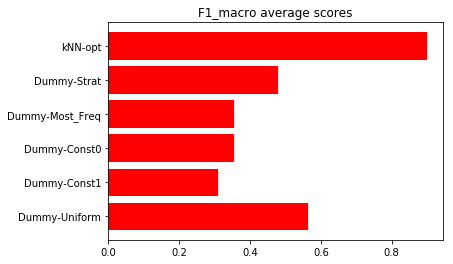

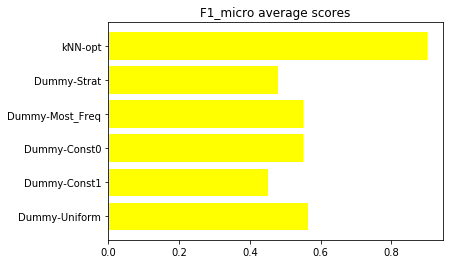

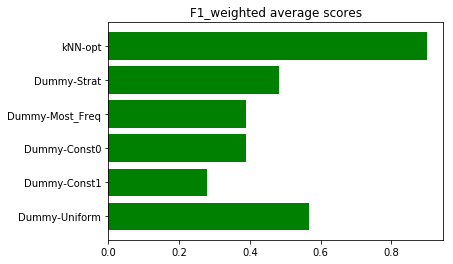

In [120]:
xron=[0,0,0,0,0,0]
function1(train_fin,train_labels,test_fin,test_labels,num1,xron,fwei1,fmac1,fmic1)

Αρχικά παρατηρούμε ότι ο Dummy Classifier δεν έχει βελτιωθεί καθόλου , που ηταν και αναμενόμενο
Στη συνέχεια παρατηρούμε μια βελτίωση της τάξης του 20% στον kNN που είναι μια αισθητή μεταβολή

In [96]:
print("Ο χρόνος για κάθε fit φαίνεται στον παρακάτω πίνακα ξεκινώντας απο τον:\n")
print('Dummy-Uniform            ',xron[0],'sec\n')
print('Dummy-Const1             ',xron[1],'sec\n')
print('Dummy-Const0             ',xron[2],'sec\n')
print('Dummy-Most_Freq          ',xron[3],'sec\n')
print('Dummy-Strat              ',xron[4],'sec\n')
print('kNN-opt                  ',xron[5],'sec\n')

Ο χρόνος για κάθε fit φαίνεται στον παρακάτω πίνακα ξεκινώντας απο τον:

Dummy-Uniform             0.006105899810791016 sec

Dummy-Const1              0.0007739067077636719 sec

Dummy-Const0              0.0011639595031738281 sec

Dummy-Most_Freq           0.0019199848175048828 sec

Dummy-Strat               0.0008587837219238281 sec

kNN-opt                   3.6716461181640625e-05 sec



Αντίστοιχα με την αποπάνω σειρά εμφανίζεται η διαφορά στην απόδοση πριν και μετα την βελτιστοποιηση για τις μετρικες
* f1-macro
* f1_micro
* f1_weighted

In [122]:
for i in range(6):
    print(fmac1[i]-fmac[i],'\n')
    print(fmic1[i]-fmic[i],'\n')
    print(fwei1[i]-fwei[i],'\n')
    print('--------------------')

0.029619657881539974 

0.030918617809905014 

0.036981226593921335 

--------------------
-0.1398553635998393 

0.1706709521896344 

-0.030815588589795107 

--------------------
-0.19493851765502201 

0.15974128530064302 

0.03519723235437899 

--------------------
-0.19493851765502201 

0.15974128530064302 

0.03519723235437899 

--------------------
0.012805477590861258 

0.014140908522087436 

0.018895364427838568 

--------------------
0.19732678190167008 

0.2020078848823652 

0.20703152884379872 

--------------------


Φαίνεται και εδώ ότι οι μεγάλες βελτιώσεις ειναι στη τελευταία περίπτωση , οι υπόλοιπες μικροαλλαγές στηρίζονται στη τυχαιότητα του dummy

O χρόνος εκτέλεσης του kNN έχει διαφόρα καθώς λαμβάνεται υπόψη η υπερπαράμετρος n_neighbors 

Για τις υπόλοιπες μετρικές σχολιάζουμε παραπάνω τα αναμενόμενα αποτελέσματα , όταν προκύπτει η τελική αρχιτεκτονική .